In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv("Churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data_ohe = pd.get_dummies(df, drop_first=True, dtype=int )

In [5]:
data_ohe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5.0,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10.0,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7.0,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3.0,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,0,1,0,1


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
target = data_ohe["Exited"]
features = data_ohe.drop("Exited", axis = 1)
train_val_features, test_features, train_val_target, test_target =  train_test_split(features,target, test_size=0.2, random_state=12345)
train_features, valid_features, train_target, valid_target =  train_test_split(train_val_features,train_val_target, test_size=0.25, random_state=12345)

In [19]:
print([test_features.shape,train_features.shape, valid_features.shape ])

[(2000, 2944), (6000, 2944), (2000, 2944)]


In [6]:
model = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=12345)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
accuracy = accuracy_score(valid_target, prediction)
f1 = f1_score(valid_target, prediction)
print(accuracy, f1)

0.8045 0.0


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=12345)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
accuracy = accuracy_score(valid_target, prediction)
print(accuracy)

In [17]:
best_f1 = 0 
best_depth = 0
best_est = 0
for i in range(10,200, 20):
        model = RandomForestClassifier(n_estimators=i, max_depth= 9, random_state=12345, class_weight='balanced')
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1 > best_f1:
            best_f1 = f1 
            best_depth = 9 
            best_est = i
print(f"max f1:{best_f1}, лушая высота: {best_depth}, лучшая est: {best_est}")

max f1:0.5395152792413066, лушая высота: 9, лучшая est: 160


In [9]:
model = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=12345, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(test_features)
accuracy = accuracy_score(test_target, prediction)
f1 = f1_score(test_target,prediction)
print(accuracy,f1)

0.769 0.5566218809980806


In [20]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', {0:1, 1:3}]
}

model = RandomForestClassifier(random_state=12345)
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid_search.fit(train_features, train_target)
prediction = model.predict(valid_features)
f1 = f1_score(valid_target, prediction)

print(f1)

KeyboardInterrupt: 

In [27]:
model = RandomForestClassifier(n_estimators=160, max_depth= 9, random_state=12345, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(test_features)
probs = model.predict_proba(test_features)[:, 1]

best_f1 = 0
best_threshold = 0.5

for threshold in np.arange(0.3, 0.7, 0.01):
    preds = (probs > threshold).astype(int)
    current_f1 = f1_score(test_target, preds)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold
print(best_f1, best_threshold)

0.5726315789473684 0.5100000000000002


In [ ]:
model = RandomForestClassifier(n_estimators=160, max_depth= 9, random_state=12345, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
probs = model.predict_proba(valid_features)[:, 1]

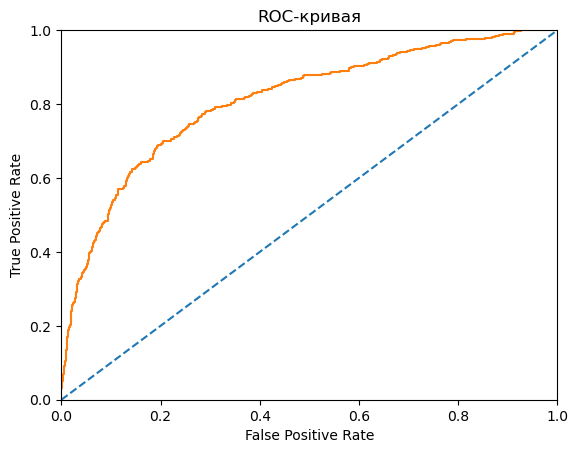

In [37]:
probabilities_test = model.predict_proba(test_features)
fpr,tpr,thresholds = roc_curve(test_target, probabilities_test[:, 1])
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [38]:
print(roc_auc_score(test_target, probabilities_test[:, 1]))

0.8103104049452783
